## Практическое задание

<ol>
    <li>1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. 
       Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?<br><br>
    </li>
    
    <li>2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.</li>
        
    <li>*3. Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность? </li>

    
    
</ol>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

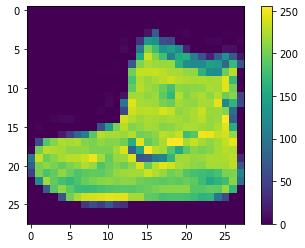

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show();

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

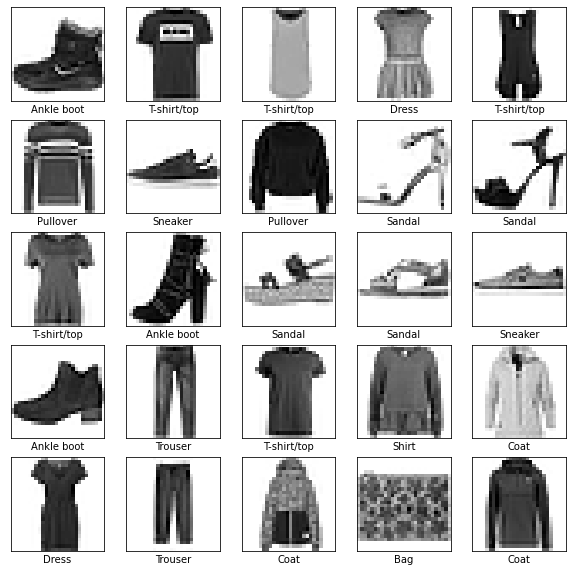

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

Добавил еще один внутренний слой к модели нейронной сети:

In [111]:
input_layer = keras.layers.Flatten(input_shape=(28, 28))
layer2 = keras.layers.Dense(128, activation='relu')
layer3 = keras.layers.Dense(128, activation='relu')
output_layer = keras.layers.Dense(10)

model = keras.Sequential([
    input_layer,
    layer2,
    layer3,
    output_layer
])

In [112]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Увеличил колво эпох до 6:

In [113]:
model.fit(train_images, train_labels, epochs=6)

Train on 60000 samples
Epoch 1/6
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4869 - accuracy: 0.8249
Epoch 2/6
60000/60000 [==============================] - 9s 150us/sample - loss: 0.3619 - accuracy: 0.8672
Epoch 3/6
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3257 - accuracy: 0.8787
Epoch 4/6
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3034 - accuracy: 0.8882
Epoch 5/6
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2863 - accuracy: 0.8938
Epoch 6/6
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2723 - accuracy: 0.8971


In [115]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3271 - accuracy: 0.8801

Test accuracy: 0.8801


Прирост качества составил примерно 0,02 к исходной модели

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [116]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [117]:
predictions = probability_model.predict(test_images)

In [118]:
predictions[0]

array([5.7842406e-08, 8.1492956e-08, 1.6597996e-07, 5.7197235e-07,
       6.2152884e-07, 8.4406033e-02, 1.7280965e-06, 2.1488769e-02,
       1.7910652e-07, 8.9410174e-01], dtype=float32)

In [119]:
np.argmax(predictions[0])

9

In [120]:
test_labels[0]

9

In [121]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

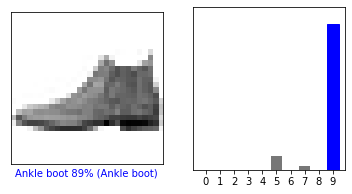

In [122]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show();

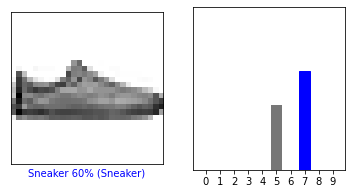

In [123]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show();

Этот экземпляр данных теперь предсказан верно.

Давайте сделаем еще несколько предсказаний - 

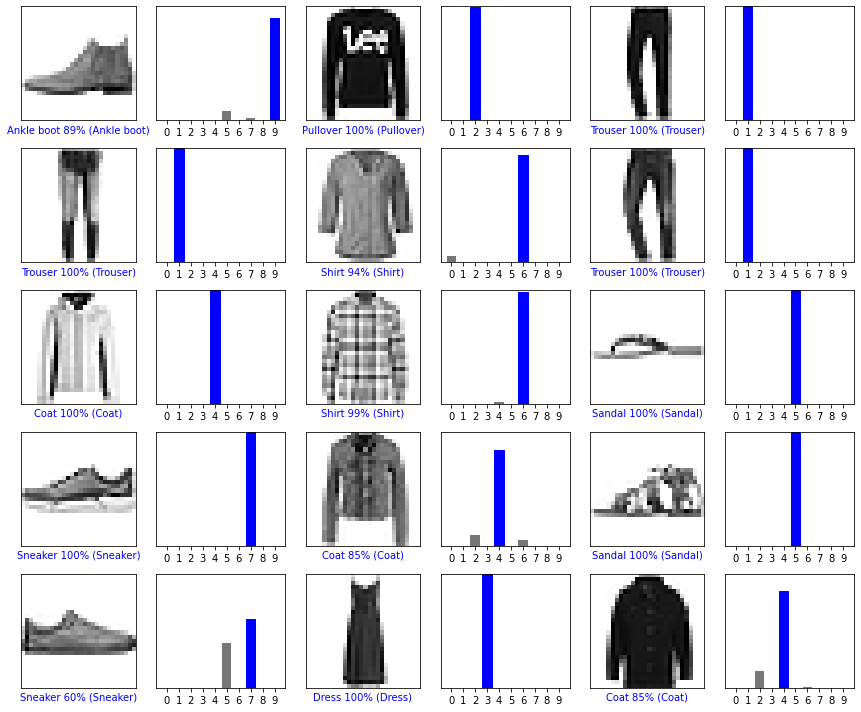

In [125]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show();

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [126]:

img = test_images[1]

print(img.shape)

(28, 28)


In [127]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [128]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.6922436e-05 6.2154705e-11 9.9618274e-01 2.2821467e-08 2.7762209e-03
  1.4144320e-13 9.9413784e-04 1.0087745e-17 4.1519879e-08 2.3087577e-15]]


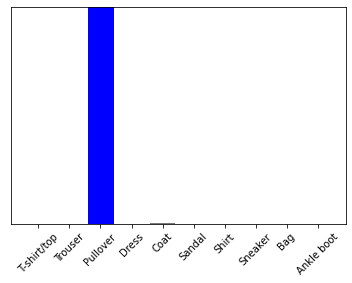

In [129]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [130]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

In [131]:
y_pred_arg = np.argmax(predictions, axis=1)
y_pred_arg

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [132]:
y_pred_arg.shape
test_labels.shape

(10000,)

(10000,)

In [85]:
from sklearn.metrics import confusion_matrix

In [133]:
confusion_matrix(test_labels, y_pred_arg)

array([[813,   1,   9,  18,   4,   0, 143,   0,  12,   0],
       [  1, 964,   1,  25,   3,   0,   4,   0,   1,   1],
       [ 13,   2, 762,  10, 139,   0,  72,   0,   2,   0],
       [ 15,   3,   7, 882,  53,   0,  37,   0,   3,   0],
       [  0,   0,  69,  20, 880,   0,  31,   0,   0,   0],
       [  0,   0,   0,   1,   0, 954,   0,  29,   1,  15],
       [103,   0,  87,  24, 130,   0, 643,   0,  13,   0],
       [  0,   0,   0,   0,   0,   9,   0, 972,   0,  19],
       [  3,   0,   3,   5,   5,   1,   3,   4, 976,   0],
       [  0,   0,   0,   1,   0,   5,   1,  38,   0, 955]], dtype=int64)

Наибольшее количество ошибочных классификаций - у номера 6, который классифицируют как 0, 2 или 4. 

Сделаем 3 модели и объединим (усредним) результат:

In [135]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=30)
hist2=model2.fit(train_images, train_labels, epochs=30)
hist3=model3.fit(train_images, train_labels, epochs=30)



Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 162us/sample - loss: 0.5006 - accuracy: 0.8250
Epoch 2/30
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3792 - accuracy: 0.8625
Epoch 3/30
60000/60000 [==============================] - 9s 142us/sample - loss: 0.3387 - accuracy: 0.8765
Epoch 4/30
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3154 - accuracy: 0.8845
Epoch 5/30
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2965 - accuracy: 0.8922
Epoch 6/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2819 - accuracy: 0.8957
Epoch 7/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2704 - accuracy: 0.8996
Epoch 8/30
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2579 - accuracy: 0.9029
Epoch 9/30
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2480 - accuracy: 0.9075
Epo

60000/60000 [==============================] - 9s 157us/sample - loss: 0.1870 - accuracy: 0.9286
Epoch 16/30
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1776 - accuracy: 0.9316
Epoch 17/30
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1741 - accuracy: 0.9333
Epoch 18/30
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1709 - accuracy: 0.9349
Epoch 19/30
60000/60000 [==============================] - 11s 178us/sample - loss: 0.1650 - accuracy: 0.9372
Epoch 20/30
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1588 - accuracy: 0.9383
Epoch 21/30
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1538 - accuracy: 0.9405
Epoch 22/30
60000/60000 [==============================] - 9s 158us/sample - loss: 0.1495 - accuracy: 0.9426
Epoch 23/30
60000/60000 [==============================] - 10s 171us/sample - loss: 0.1428 - accuracy: 0.9444
Epoch 24/30
60000/60000 [

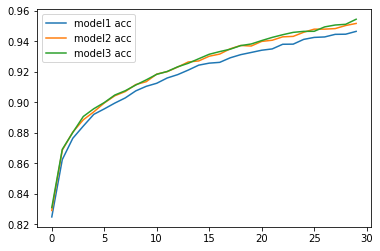

In [136]:
plt.plot(hist1.history['accuracy'],label='model1 acc')
plt.plot(hist2.history['accuracy'],label='model2 acc')
plt.plot(hist3.history['accuracy'],label ='model3 acc')
plt.legend()
plt.show();

In [138]:
# Save the model to disk.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# Load the model from disk later using:
# model.load_weights('model.h5')

In [140]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10)(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10)(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10)(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)
model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)
model_all=keras.models.Model(inputs =[input1],outputs =out_all)

In [141]:
model_all.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_17 (Flatten)            (None, 784)          0           input_6[0][0]                    
__________________________________________________________________________________________________
flatten_15 (Flatten)            (None, 784)          0           input_6[0][0]                    
__________________________________________________________________________________________________
flatten_16 (Flatten)            (None, 784)          0           input_6[0][0]                    
____________________________________________________________________________________________

In [142]:
model_all.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [143]:
predictions_single=model_all.predict(img)

print(predictions_single)

[[9.3178170e-07 3.4926390e-20 9.9989343e-01 1.4582583e-16 1.0559276e-04
  1.4308682e-13 4.7201915e-08 1.6430688e-25 4.1470360e-15 4.3581255e-23]]


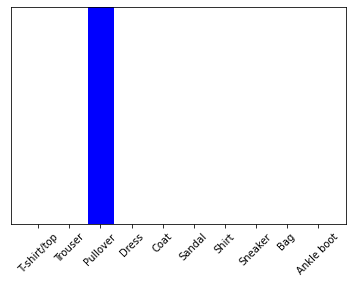

In [144]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [145]:
test_loss, test_acc = model_all.evaluate(test_images,  test_labels, verbose=2)

10000/10000 - 2s - loss: 1.5692 - accuracy: 0.9059


для выполнения 3го задания повторил решение из инструкции tf: https://www.tensorflow.org/tutorials/keras/text_classification_with_hub

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")


Version:  2.1.0
Eager mode:  True
Hub version:  0.8.0
GPU is available


In [2]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)


In [3]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [4]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int64)>

In [5]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: shape=(3, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064]],
      dtype=float32)>

In [6]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [8]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)


Epoch 1/20
30/30 [==============================] - 8s 253ms/step - loss: 1.1479 - accuracy: 0.5099 - val_loss: 0.6783 - val_accuracy: 0.5650
Epoch 2/20
30/30 [==============================] - 4s 145ms/step - loss: 0.6448 - accuracy: 0.6303 - val_loss: 0.6190 - val_accuracy: 0.6557
Epoch 3/20
30/30 [==============================] - 4s 141ms/step - loss: 0.5929 - accuracy: 0.6647 - val_loss: 0.5681 - val_accuracy: 0.6935
Epoch 4/20
30/30 [==============================] - 5s 169ms/step - loss: 0.5489 - accuracy: 0.7024 - val_loss: 0.5336 - val_accuracy: 0.7192
Epoch 5/20
30/30 [==============================] - 4s 142ms/step - loss: 0.5125 - accuracy: 0.7330 - val_loss: 0.5048 - val_accuracy: 0.7398
Epoch 6/20
30/30 [==============================] - 4s 150ms/step - loss: 0.4815 - accuracy: 0.7601 - val_loss: 0.4788 - val_accuracy: 0.7552
Epoch 7/20
30/30 [==============================] - 5s 159ms/step - loss: 0.4482 - accuracy: 0.7809 - val_loss: 0.4541 - val_accuracy: 0.7780
Epoch 

In [9]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))


loss: 0.317
accuracy: 0.858
